In [1]:
from matplotlib import pyplot as plt
import numpy as np

# сгенерируем выборку из двух нормальных распределений

# задаём параметры смеси
N = 10000
mu_1, sigma_1 = 3, 2
mu_2, sigma_2 = -5, 2
p = 0.3

In [2]:
# два распределения
dist_1 = np.random.randn(N) * sigma_1 + mu_1
dist_2 = np.random.randn(N) * sigma_2 + mu_2

In [3]:
# смешиваем их
mask = np.random.choice([0, 1], p=[p, 1 - p], size=N)
dist = dist_1 * mask + dist_2 * (1 - mask)

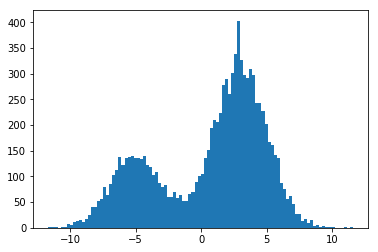

In [4]:
plt.hist(dist, bins=100);

## Пример фитирования с probfit

In [5]:
from probfit import AddPdf, gaussian, Normalized, AddPdfNorm, UnbinnedLH, BinnedLH
from iminuit import Minuit

In [6]:
gaussian?

In [7]:
# задаём функции, которые считают pdf в точке x
def gaussian_one(x, mean_1, sigma_1):
    return gaussian(x, mean_1, sigma_1)

# гауссово распределение задаётся два раза одинаковым образом
# чтобы имена переменных были разных
def gaussian_two(x, mean_2, sigma_2):
    return gaussian(x, mean_2, sigma_2)

# AddPdfNorm складывает распределения в данному случе в результате будет
# pdf = N(x|mean_1, sigma_1) + N(x|mean_2, sigma_2)
pdf = AddPdfNorm(gaussian_one, gaussian_two, facname=['prob'])

In [8]:
# UnbinnedLH берёт pdf и данные и считает log-likelihood 
unbinned_likelihood = UnbinnedLH(pdf, dist)
unbinned_likelihood(3, 2, -5, 3, 0.1)

34676.58380518743

In [9]:
# начальное приближение для переменных
init = dict(
    mean_1=1,
    sigma_1=1,
    mean_2=-1,
    sigma_2=1,
    prob=0.5,
)

# их пределы
# особенно важно для sigma, которое не может быть отрицательным
limits = dict(
    limit_mean_1 = (-100, 100),
    limit_mean_2 = (-100, 100),
    limit_sigma_1 = (0, 100),
    limit_sigma_2 = (0, 100),
    limit_prob = (0., 1.)
)

# начальный шаг минимизации
# если он слишком большой, то не сойдётся минимизация

errors = dict(
    error_mean_1=0.01,
    error_mean_2=0.01,
    error_sigma_1=0.01,
    error_sigma_2=0.01,
    error_prob=0.01,
)
minuit = Minuit(unbinned_likelihood, **init, **limits, **errors)

In [10]:
# первый этап минимизации
minuit.migrad()

FCN = 26619.824699866924 
 TOTAL NCALL = 176 
 NCALLS = 176 
 
 
 EDM = 7.821290166861375e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mean_1,2.99654,0.0277718,,,-100,100,No
1,sigma_1,2.00223,0.0220855,,,0,100,No
2,mean_2,-5.01456,0.0464964,,,-100,100,No
3,sigma_2,1.9539,0.0346116,,,0,100,No
4,prob,0.703191,0.00505764,,,0,1,No


({'fval': 26619.824699866924,
  'edm': 7.821290166861375e-07,
  'nfcn': 176,
  'up': 0.5,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'mean_1',
   'value': 2.9965405215121876,
   'error': 0.02777175752419936,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': -100.0,
   'upper_limit': 100.0},
  {'number': 1,
   'name': 'sigma_1',
   'value': 2.0022323445372137,
   'error': 0.022085497786955566,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.0,
   'upper_limit': 100.0},
  {'number': 2,
   'name': 'mean_2',
   'value': -5.014561756573912,
   'error': 0.04649635208165

In [11]:
# более точный, второй этап минимизации
# плюс возвращаются ошибки
result = minuit.minos()

Error,-0.027819359963286414,0.027711096529269792
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.021470201036264177,0.021832619303863716
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.04607740318113605,0.046786410704771096
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.034963807858157274,0.036000748616472324
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.005134395517643754,0.005100476381048678
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


In [12]:
result['mean_1']['min'], mu_1

(2.9965405215121876, 3)

In [13]:
result['mean_2']['min'], mu_2

(-5.014561756573912, -5)

In [14]:
result['sigma_1']['min'], sigma_1

(2.0022323445372137, 2)

In [15]:
result['sigma_2']['min'], sigma_2

(1.9538970424581525, 2)

In [16]:
result['prob']['min'], 1 - p

(0.703191285986299, 0.7)

### Минимизация с помощью pytorch

In [17]:
import torch
from torch.distributions.normal import Normal
from torch import optim

In [18]:
# загружаем данные в pytorch формат
data_torch = torch.tensor(dist, dtype=torch.float32)

In [19]:
# переменные которые мы будем оптимизировать градиентным спуском
mean_1_torch = torch.tensor(-1., requires_grad=True)
mean_2_torch = torch.tensor(1., requires_grad=True)
sigma_1_torch = torch.tensor(1., requires_grad=True)
sigma_2_torch = torch.tensor(1., requires_grad=True)
p_torch = torch.tensor(0.5, requires_grad=True)

In [20]:
EPS = 1e-8
# подсчёт  log-likelihood
def log_likelihood_calc(data):
    log_probs = (Normal(mean_1_torch, sigma_1_torch).log_prob(data_torch).exp() * p_torch +
     Normal(mean_2_torch, sigma_2_torch).log_prob(data_torch).exp() * (1 - p_torch) + EPS).log()
    return log_probs.sum()

In [21]:
# оптимизатор
opt = optim.RMSprop([mean_1_torch, mean_2_torch, sigma_1_torch, sigma_2_torch, p_torch],
                    lr=3e-3)

log_likelihoods = []
for i in range(3000):
    # считаем новый likelihood
    log_likelihood = -log_likelihood_calc(data_torch)
    log_likelihoods.append(-log_likelihood.detach().numpy())
    
    # обнуляем градиенты с прошлого шага
    opt.zero_grad()
    # считаем градиенты
    log_likelihood.backward()
    # делаем шаг
    opt.step()

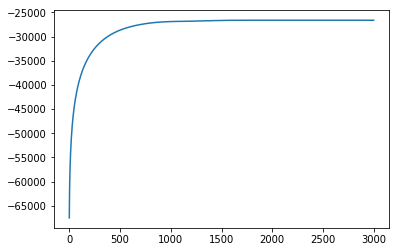

In [22]:
plt.plot(log_likelihoods)

In [23]:
mean_1_torch

tensor(-5.0144, requires_grad=True)

In [24]:
sigma_1_torch

tensor(1.9560, requires_grad=True)

In [25]:
mean_2_torch

tensor(2.9966, requires_grad=True)

In [26]:
sigma_2_torch

tensor(2.0002, requires_grad=True)

In [27]:
p_torch

tensor(0.2953, requires_grad=True)